In [4]:
# Lade benötigte Programmpakete

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import json
import sklearn as sk
import csv

In [5]:
# Lade die Daten 

dirpath = "./data/Bike_rental_modified.csv"
header = [
    "instant","dteday","season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed","casual","registered","cnt","intday"
]
bike_rental = pd.read_csv(dirpath)

In [6]:
display(bike_rental) # Zeige Dataframe an

Unnamed: 0  instant      dteday  season  yr  mnth  holiday  weekday  \
0             0        1  2011-01-01       1   0     1        0        6   
1             1        2  2011-01-02       1   0     1        0        0   
2             2        3  2011-01-03       1   0     1        0        1   
3             3        4  2011-01-04       1   0     1        0        2   
4             4        5  2011-01-05       1   0     1        0        3   
..          ...      ...         ...     ...  ..   ...      ...      ...   
542         542      543  2012-06-26       3   1     6        0        2   
543         543      544  2012-06-27       3   1     6        0        3   
544         544      545  2012-06-28       3   1     6        0        4   
545         545      546  2012-06-29       3   1     6        0        5   
546         546      547  2012-06-30       3   1     6        0        6   

     workingday  weathersit       temp     atemp      hum  windspeed  casual  \
0             0           2  14.110847  18.18125  80.5833  10.749882     331   
1             0           2  14.902598  17.68695  69.6087  16.652113     131   
2             1           1   8.050924   9.47025  43.7273  16.636703     120   
3             1           1   8.200000  10.60610  59.0435  10.739832     108   
4             1           1   9.305237  11.46350  43.6957  12.522300      82   
..          ...         ...        ...       ...      ...        ...     ...   
542           1           1  25.864153  29.73520  37.3333  23.292014    1077   
543           1           1  28.597500  32.03960  36.0000  18.208925    1077   
544           1           1  30.715847  33.77560  42.2500  11.500550     921   
545           1           1  34.200847  39.33065  48.8750  11.082939     829   
546           0           1  31.365000  34.37540  60.1250  10.791757    1455   

     registered   cnt  intday  
0           654   985       0  
1           670   801       1  
2          1229  1349       2  
3          1454  1562       3  
4          1518  1600       4  
..          ...   ...     ...  
542        6365  7442     542  
543        6258  7335     543  
544        5958  6879     544  
545        4634  5463     545  
546        4232  5687     546  

[547 rows x 18 columns]

In [7]:
# auf Zeilen kann mit .loc oder .iloc zugegriffen werden, auf Spalten mittels der Spaltennamen

In [8]:
bike_rental.loc[5] # Zugriff auf Element mit Index 5

Unnamed: 0             5
instant                6
dteday        2011-01-06
season                 1
yr                     0
mnth                   1
holiday                0
weekday                4
workingday             1
weathersit             1
temp            8.378268
atemp           11.66045
hum              51.8261
windspeed       6.000868
casual                88
registered          1518
cnt                 1606
intday                 5
Name: 5, dtype: object

In [9]:
bike_rental.iloc[5:10] # Zugriff auf Element mit Index 5 bis 10 (exklusive 10)

Unnamed: 0  instant      dteday  season  yr  mnth  holiday  weekday  \
5           5        6  2011-01-06       1   0     1        0        4   
6           6        7  2011-01-07       1   0     1        0        5   
7           7        8  2011-01-08       1   0     1        0        6   
8           8        9  2011-01-09       1   0     1        0        0   
9           9       10  2011-01-10       1   0     1        0        1   

   workingday  weathersit      temp     atemp      hum  windspeed  casual  \
5           1           1  8.378268  11.66045  51.8261   6.000868      88   
6           1           2  8.057402  10.44195  49.8696  11.304642     148   
7           0           2  6.765000   8.11270  53.5833  17.875868      68   
8           0           1  5.671653   5.80875  43.4167  24.250650      54   
9           1           1  6.184153   7.54440  48.2917  14.958889      41   

   registered   cnt  intday  
5        1518  1606       5  
6        1362  1510       6  
7         891   959       7  
8         768   822       8  
9        1280  1321       9

In [10]:
bike_rental['cnt'] # Zugriff auf einzelne Spalten mittels Name

0       985
1       801
2      1349
3      1562
4      1600
       ... 
542    7442
543    7335
544    6879
545    5463
546    5687
Name: cnt, Length: 547, dtype: int64

In [11]:
bike_rental['cnt'].loc[10] # Zugriff auf das 10. Element von Count 

np.int64(1263)

In [12]:
bike_rental['weathersit'].value_counts() # Zähle die Werte von weathersit

weathersit
1    349
2    181
3     17
Name: count, dtype: int64

In [13]:
bike_rental['workingday'].value_counts()

workingday
1    375
0    172
Name: count, dtype: int64

Text(0, 0.5, 'cnt')

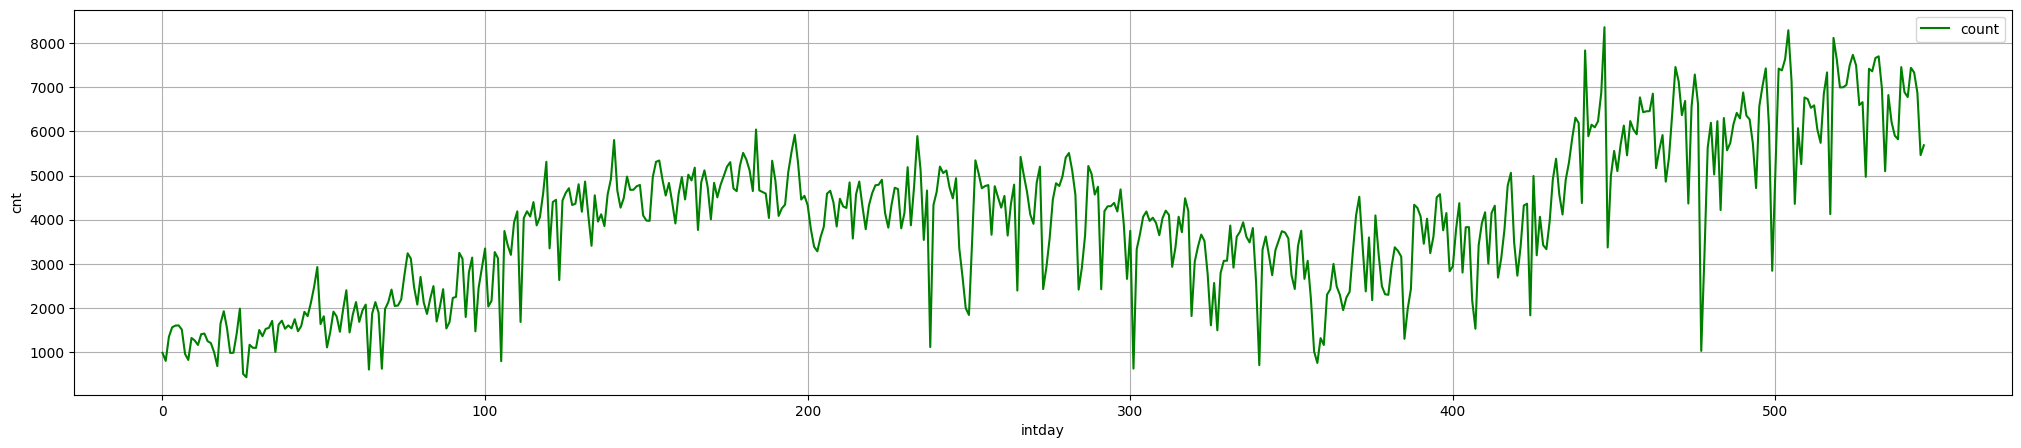

In [14]:
# Ein einfacher Plot:
fig,ax=plt.subplots(1,figsize=(25,5)) # Erzeuge ein Figure mit 1 Subplot (axes)
ax.plot(bike_rental['intday'],bike_rental['cnt'],label='count',color='green') # Plotte intday (x) gegen cnt, verwende das LAbel 'cnt'
ax.grid(True) # Füge ein Grid dazu
ax.legend() # ;Mach eine Legende
ax.set_xlabel('intday') # Setze ein xlabel 'intday'
ax.set_ylabel('cnt') # Setze ein xlabel 'cnt'

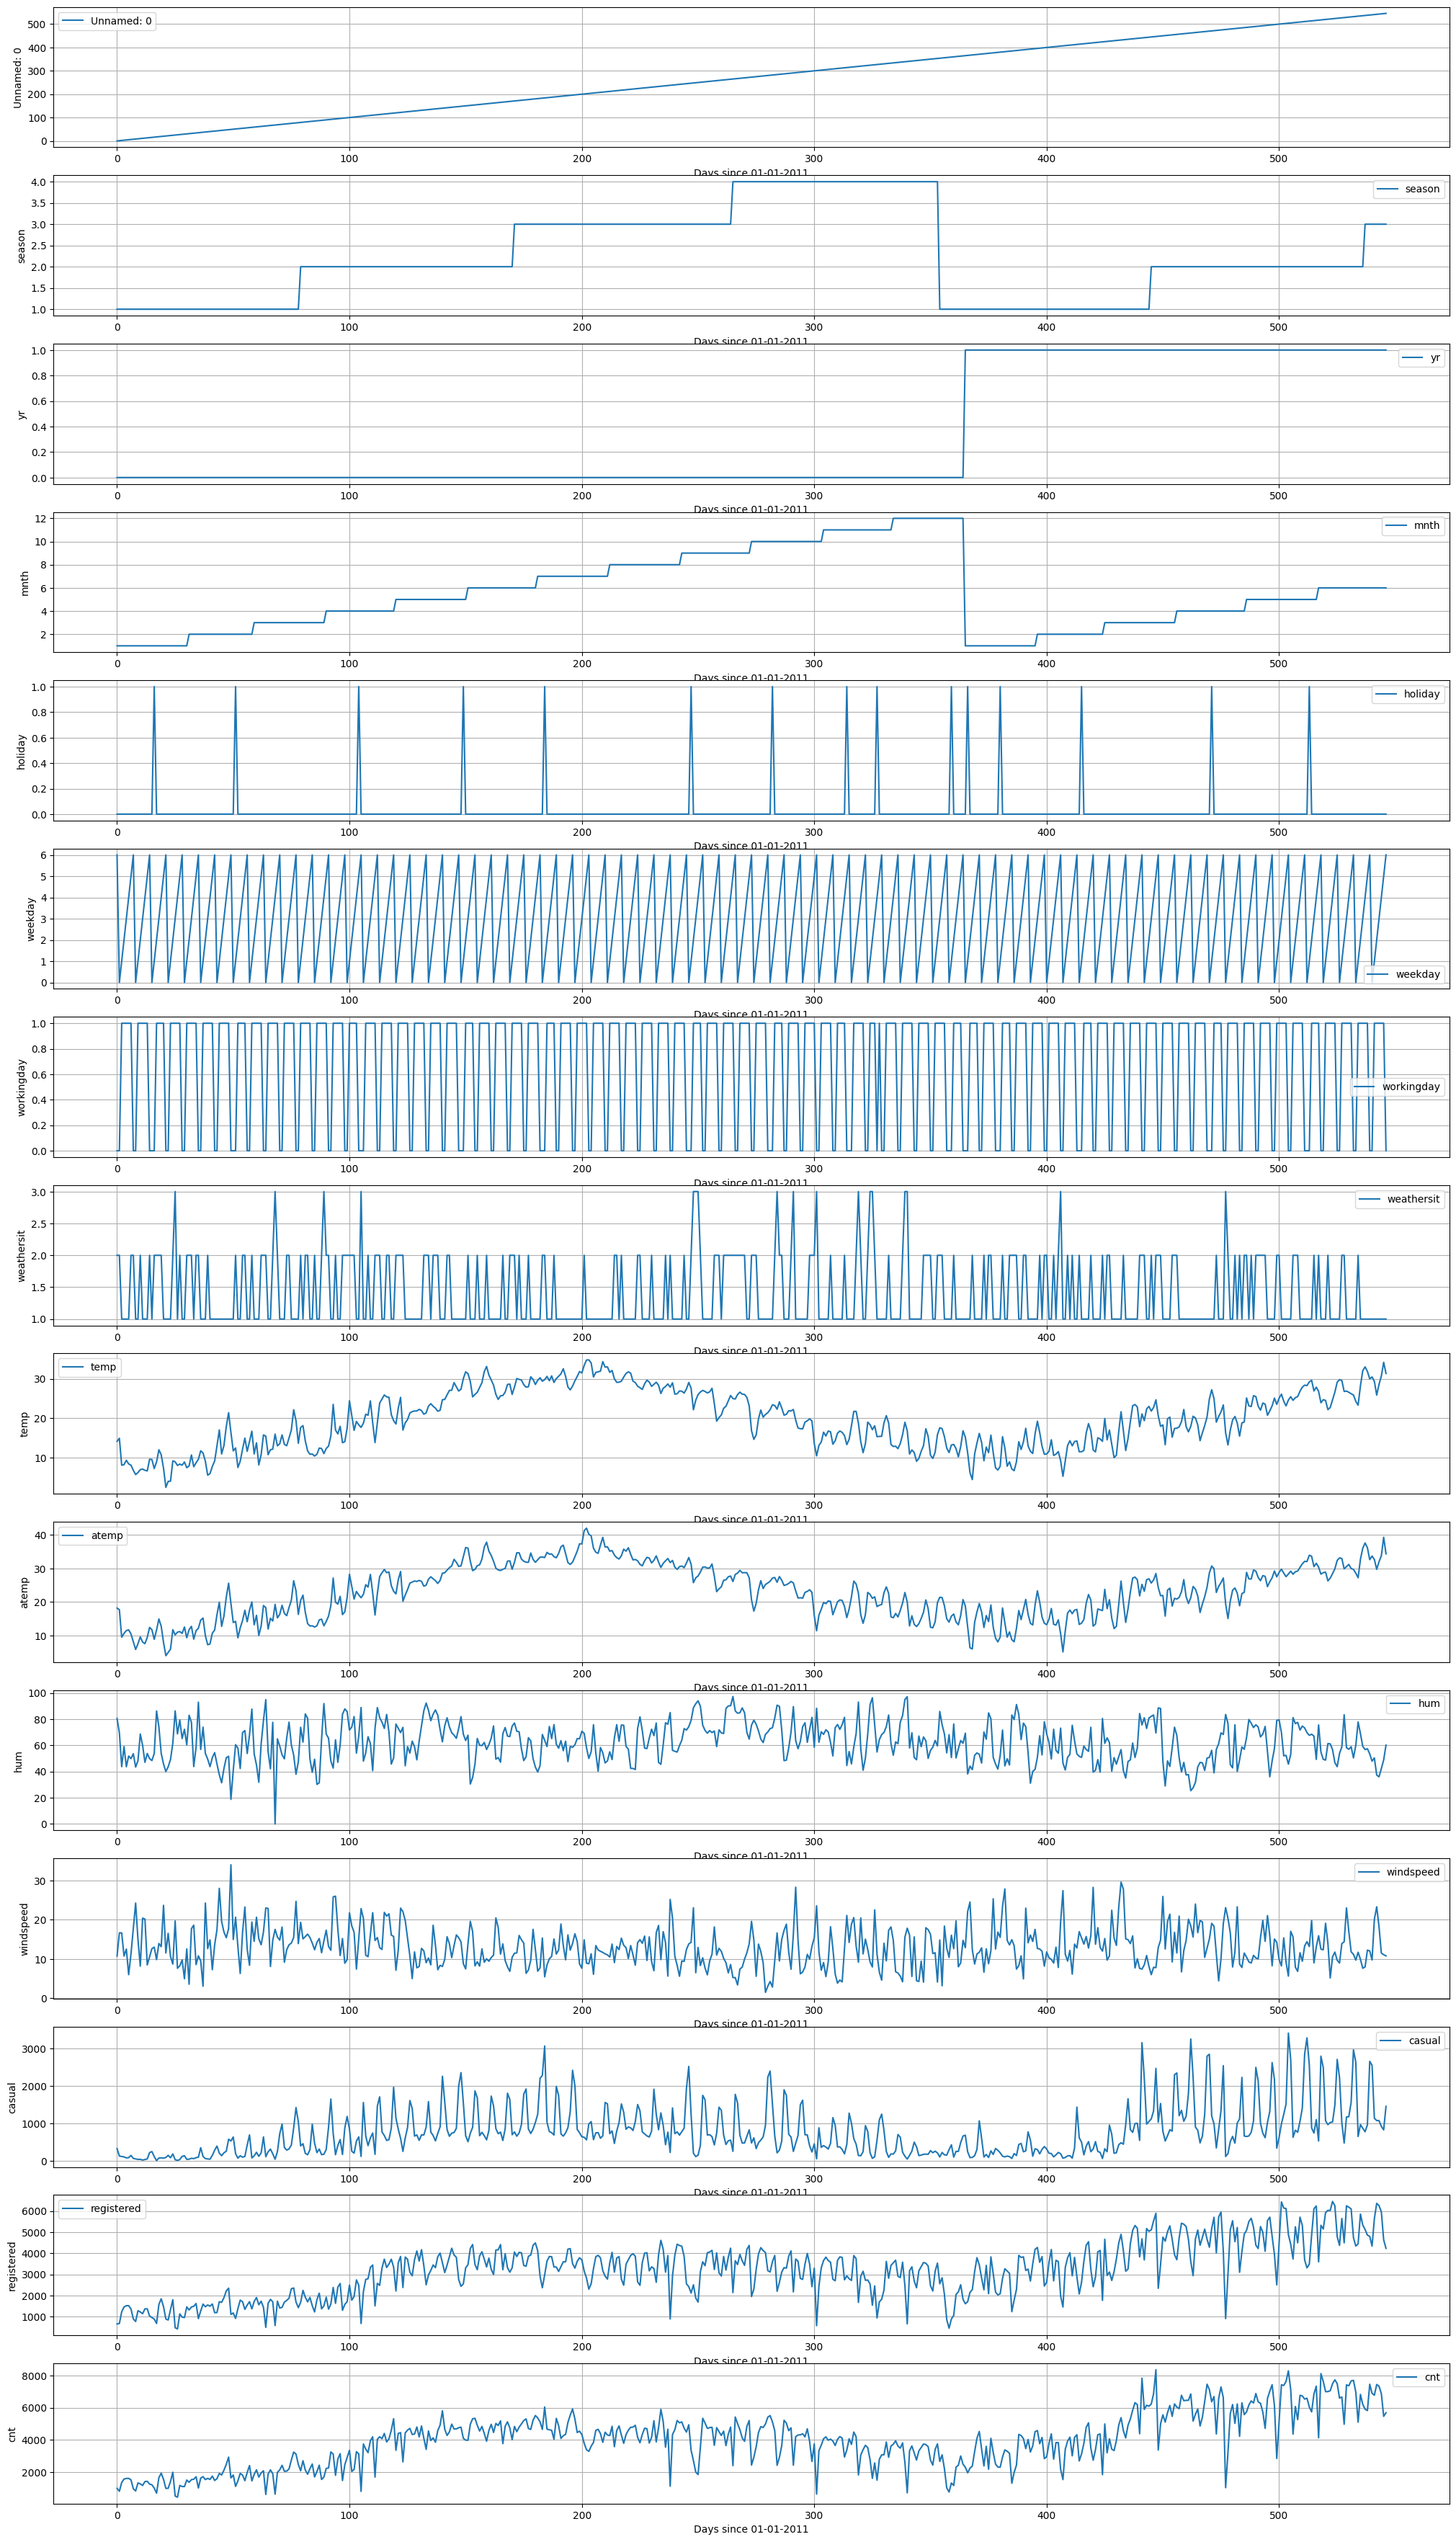

In [15]:
# Zeige alle Zeitreihen

n=len(bike_rental.columns) # Anzahl der Spalten

fig,ax=plt.subplots(n-3,figsize=(25,3*(n-3))) # Bilde eine Figure mit n-3 Subplots 
i=0 # Startwert für Iteration durch die Liste von axes (ax)
for key in bike_rental.columns: # wähle alle Elemente (key) aus bike_rental.columns
    if key not in ['instant','dteday','intday']: # Verwende diese keys in Liste nicht
        ax[i].plot(bike_rental['intday'],bike_rental[key],label=key) # plotte in i-ten subplot, 
        ax[i].set_ylabel(key) # Setze Beschriftung 
        i+=1 # gehe zu nächsten Subplot
for a in ax: # Für alle Subplots
    a.grid(True)
    a.legend()
    a.set_xlabel('Days since 01-01-2011')
    

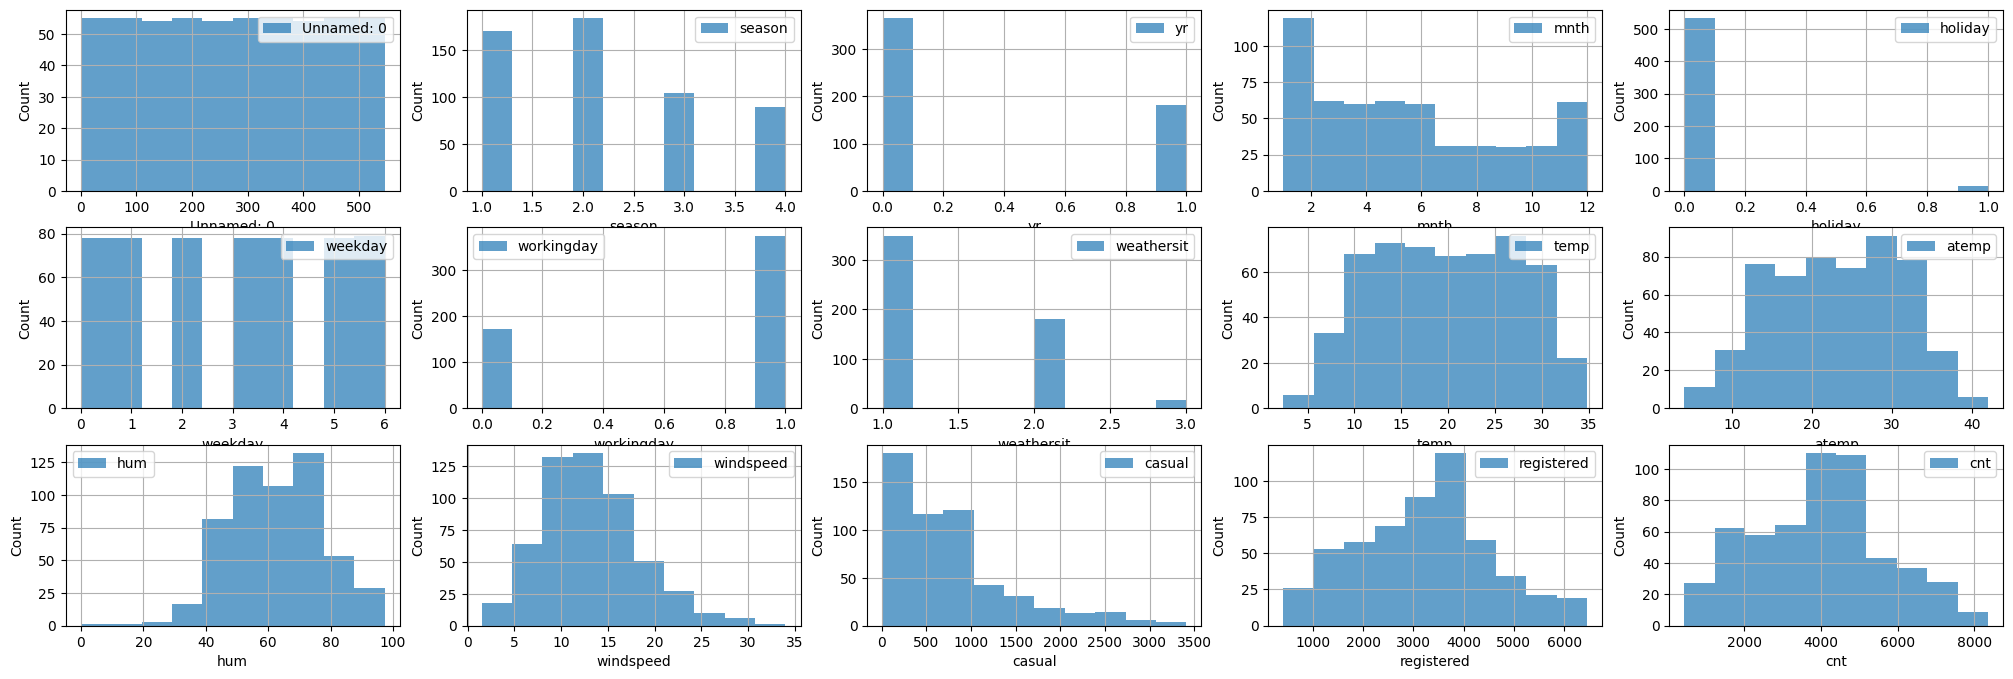

In [16]:
# Zeige Histogramme

n=len(bike_rental.columns)

n_row=3 # Reihen von Subplots
n_col=(n-3)//n_row # Spalten von Subplots
fig,ax=plt.subplots(n_row,n_col,figsize=(25,8))# Erzeuge figure mit n_row x n_col subplots 
# ax ist jetzt ein array der dimension n_row und n_col und muss doppelt indexiert werden 
i=0
j=0
for key in bike_rental.columns: # iteriere durch alle Daten
    if key not in ['instant','dteday','intday']:
        ax[j][i].hist(bike_rental[key],label=key,alpha=0.7) # mache ein histogramm zu jedem key
        ax[j][i].set_xlabel(key)

        i+=1 # nächste spalte
        if i==n_col: # falls am Ende der Zeile (kann man sicher schöner auch schreiben) 
            j+=1 #nächste Zeile
            i=0 # 1. Spalte
            

for a in ax.flatten(): # Für alle subplot in ax
    a.grid(True)
    a.legend()
    a.set_ylabel('Count')

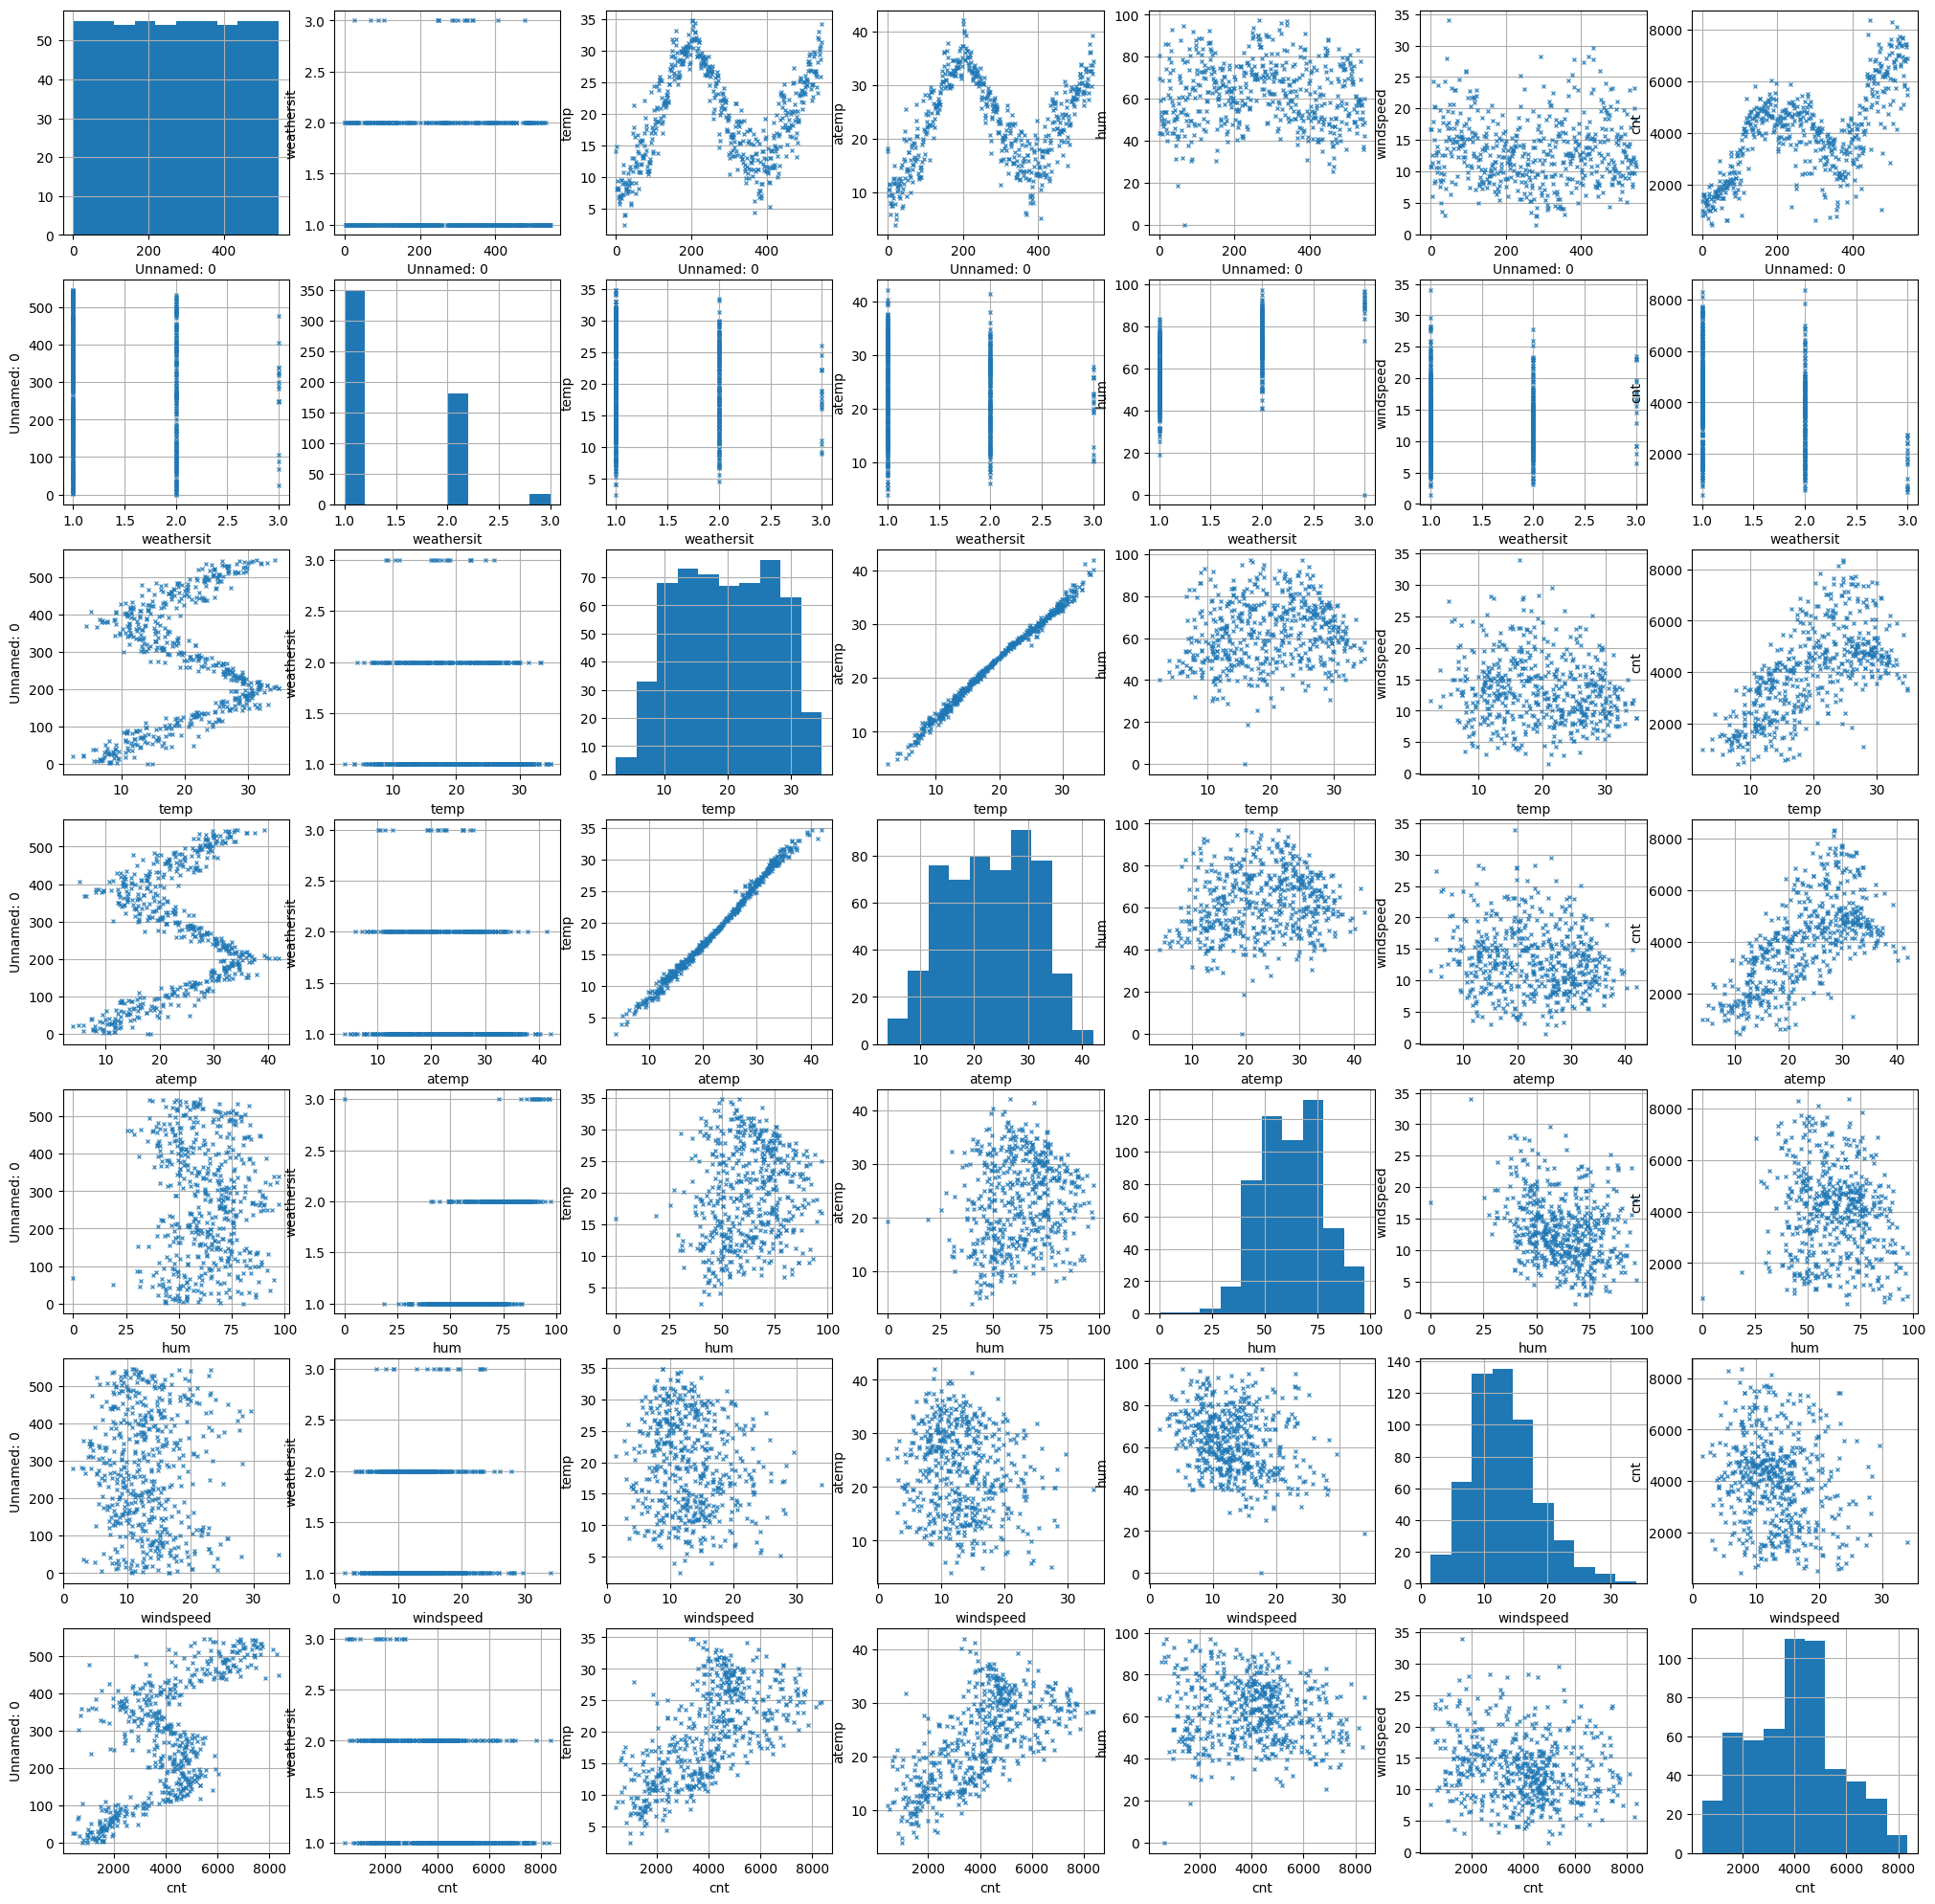

In [17]:
# Zeige Scatterplots

no_show_columns=  ['instant','dteday','intday','casual','registered','season','yr','mnth','holiday','weekday','workingday'] # Wir wollen keine Scatterplots für diese Daten
n=len(bike_rental.columns)-len(no_show_columns) # Bestimme Anzahl der keys, die geplottet werden 
show_columns=list(bike_rental.columns) # mache liste daraus
for column in no_show_columns: # Lösche die nicht verwendeten keys aus Liste
    show_columns.remove(column)
    
fig,ax=plt.subplots(n,n,figsize=(25,25))
for i,key in  enumerate(show_columns): # enumerate numeriert gleichzeitig die zurückgegebenene Elemente durch 
    for j,key2 in enumerate(show_columns):
        if key==key2: # Auf Diagonale Histogramme
            ax[i][i].hist(bike_rental[key],label=key)
            ax[i][i].set_xlabel(key)
        else: # Off-Daigonal Scatter Plots
            ax[i][j].plot(bike_rental[key],bike_rental[key2],ls='',marker='x',ms=2.5,alpha=0.8)
            ax[i][j].set_xlabel(key)
            ax[i][j].set_ylabel(key2)
        
        ax[i][j].grid(True)

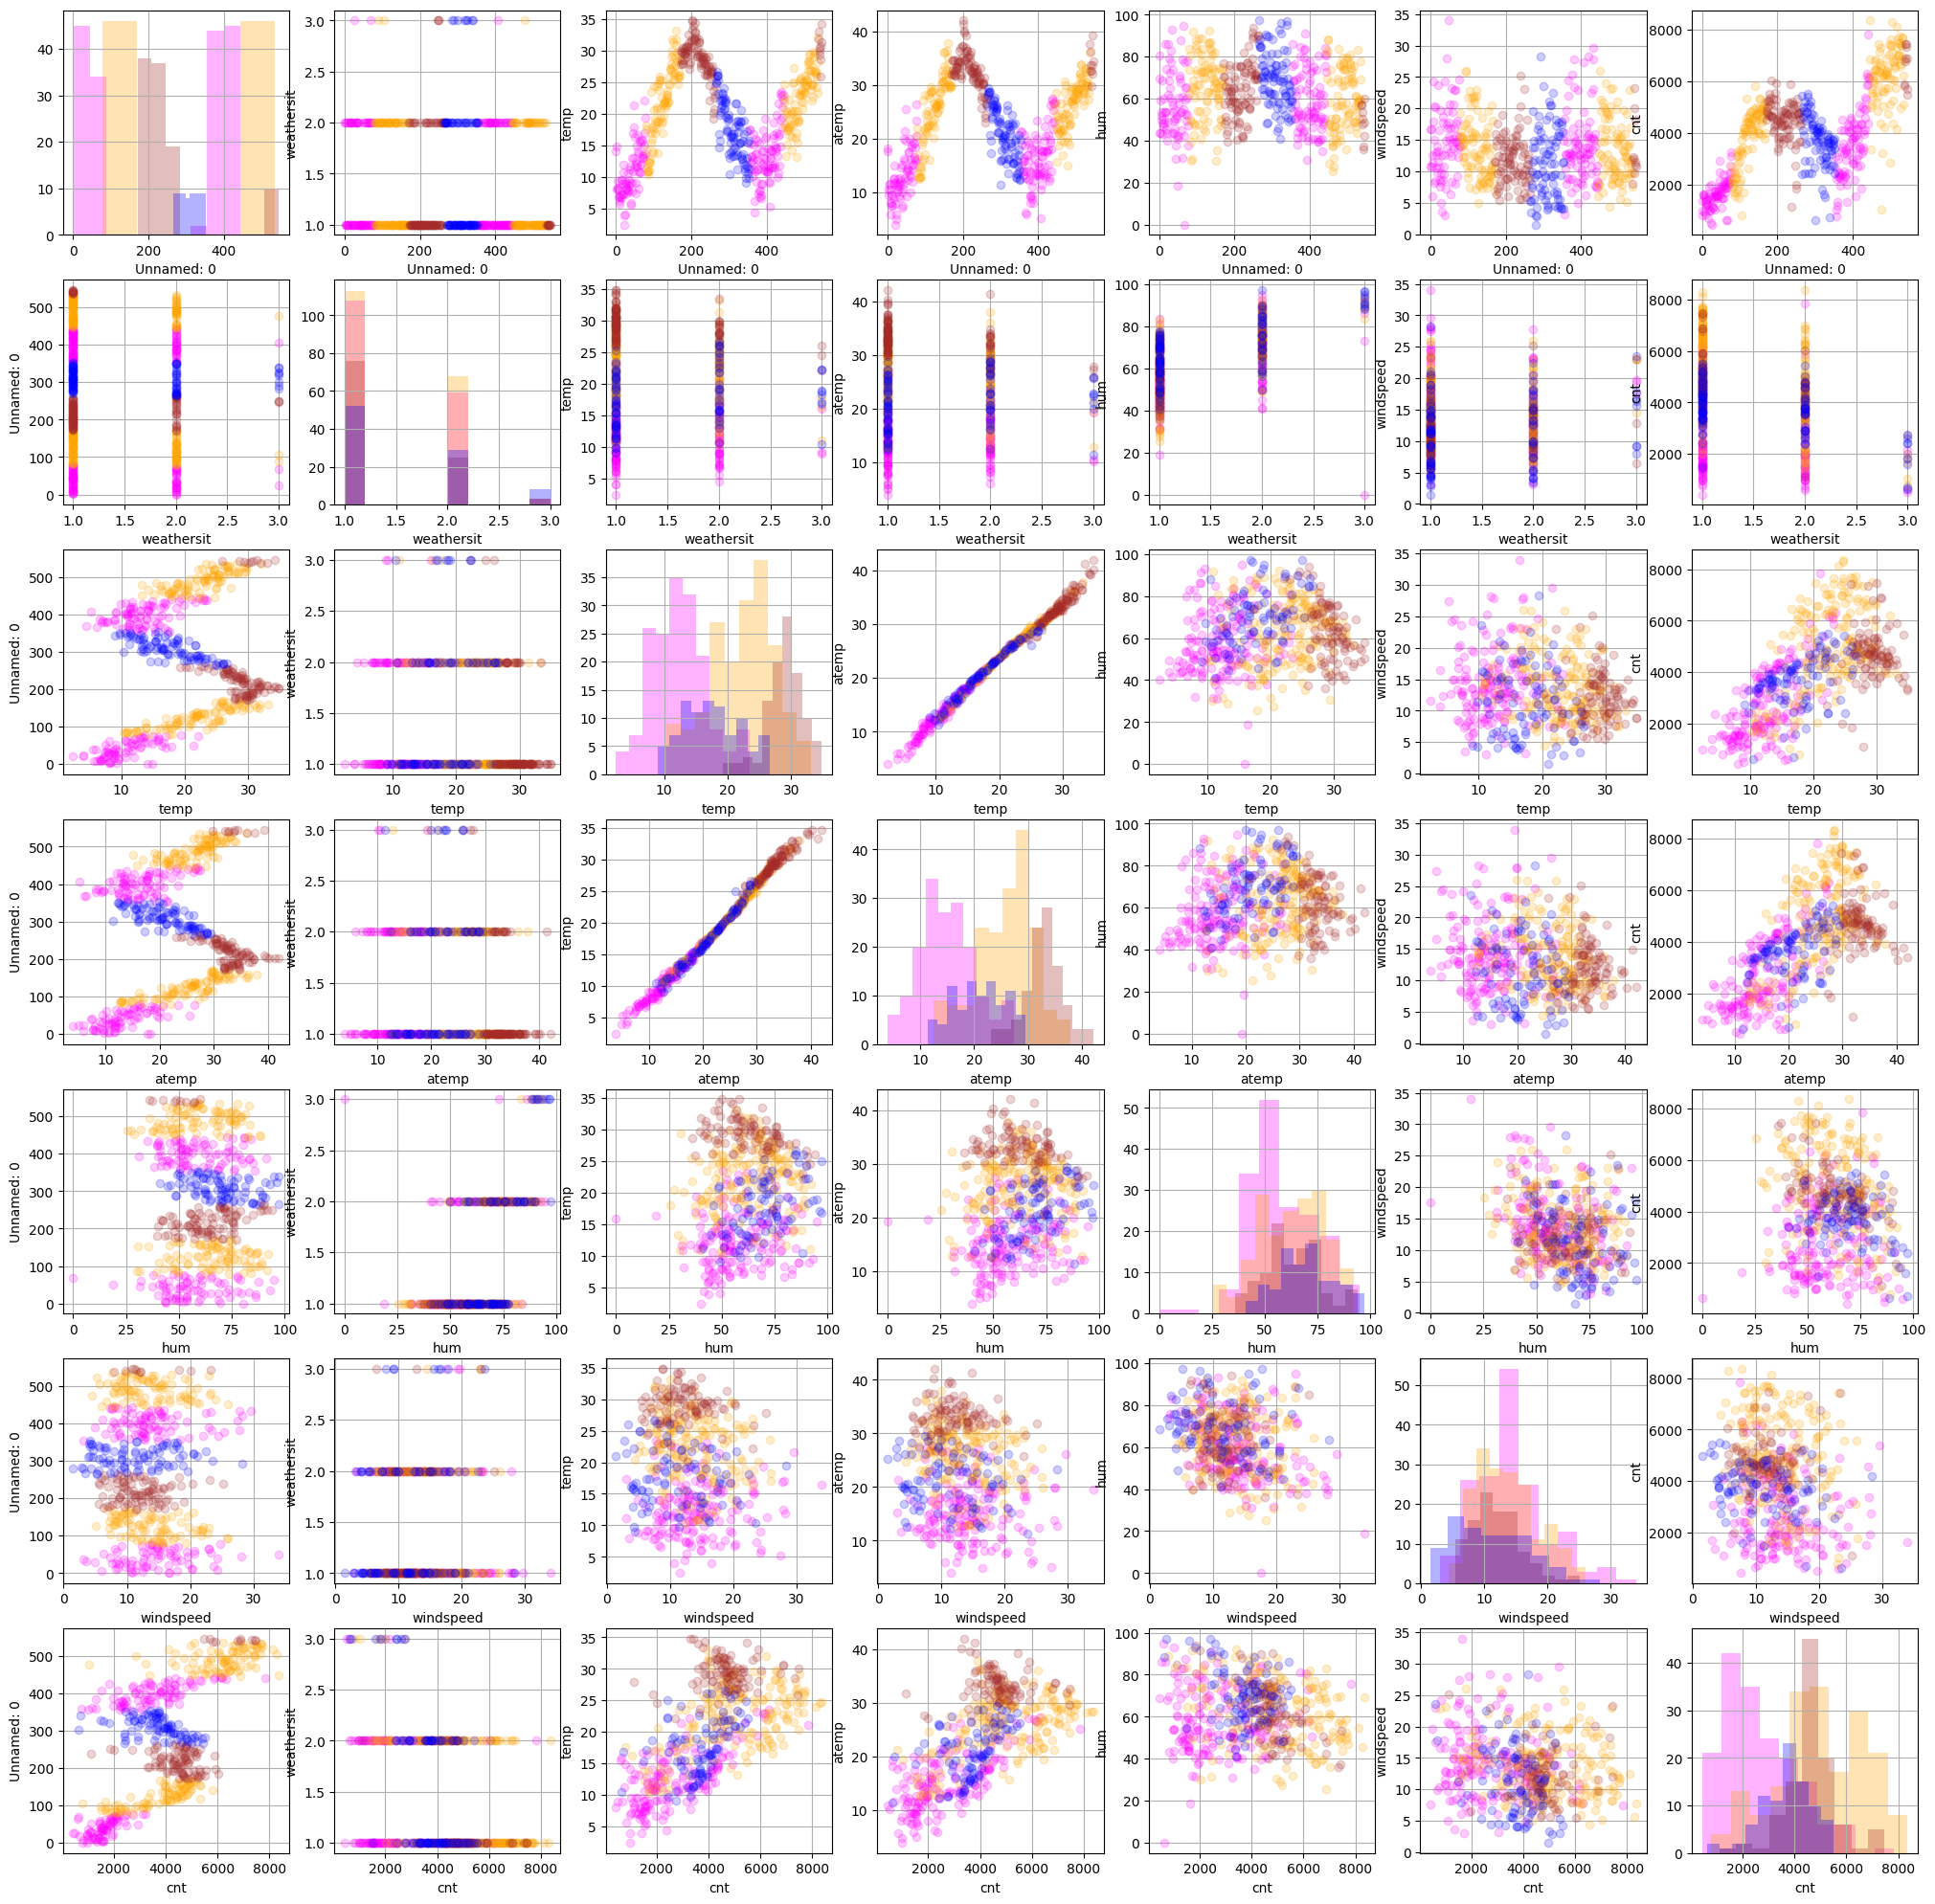

In [18]:
# Codiere Jahreszeit in Farbe

no_show_columns=  ['instant','dteday','intday','casual','registered','season','yr','mnth','holiday','weekday','workingday'] # Welche Spalten nicht angezeigt werden sollen
n=len(bike_rental.columns)-len(no_show_columns) # Anzahl der zu zeigenden Zellen
show_columns=list(bike_rental.columns) # Bilde liste mit allen Colomns
for column in no_show_columns:
    show_columns.remove(column) # Wie oben
    
spec_feat='season' # Features nach welchem ich Farblich unterscheiden soll
specials=np.sort(np.unique(bike_rental[spec_feat].values)) # Mache  Liste der verschiedenen Einträge von specials
color_dict={1:'fuchsia', # Dictionary, das die Farben zu den einzelnen Werten codiert (lt Readme: 1 Spring, 2 Summer, 3 Autumn, 4 Winter)
           2:'orange',
           3:'brown',
           4:'blue'}

fig,ax=plt.subplots(n,n,figsize=(25,25))
for i,key in  enumerate(show_columns):
    for j,key2 in enumerate(show_columns):
        if key==key2: # Auf Diagonale
            for spec in specials: # iteriere durch die Werte von Specials 
                cond=(bike_rental[spec_feat]==spec) #erzeuge einen bool'schen Vektor der  True oder False entält, 
                #ob das entsprechende Element in den Daten mit dem iterationselement spec übereinstimmt
                # Mit diesem Vektor [cond] kann dann mit .loc[cond] gefiltert werden, dass er nur die True-Elemente behält
                ax[i][i].hist(bike_rental[key].loc[cond],color=color_dict[spec],alpha=0.3,label=key) # Plotte immer
                #nur die Elemente die True in cond als Wert haben, codiere mit Farbe
                # Verwende als Farbwert den Eintrag im Dictionary color_dict, Verwende als Label denn key und die Season. Joine beide Strings mit einem _ dazwischen
            ax[i][i].set_xlabel(key)
        else: # Off-Diagonale wie oben
            for spec in specials:
                cond=(bike_rental[spec_feat]==spec)
                ax[i][j].plot(bike_rental[key].loc[cond],bike_rental[key2].loc[cond],ls='',marker='o',alpha=0.2,color=color_dict[spec])
            ax[i][j].set_xlabel(key)
            ax[i][j].set_ylabel(key2)

        ax[i][j].grid(True)


In [ ]:

corr=bike_rental.corr() # Bilder Correlationen zwischen allen Spalten
display(corr)

In [21]:
corr['cnt'].sort_values(ascending=False) # Sortiere Correlationen von cnt mit Werten

NameError: name 'corr' is not defined

In [22]:
# Erzeuge neue Features aus der existierenden:
bike_rental['temp_quotient']=bike_rental['atemp']/bike_rental['temp']

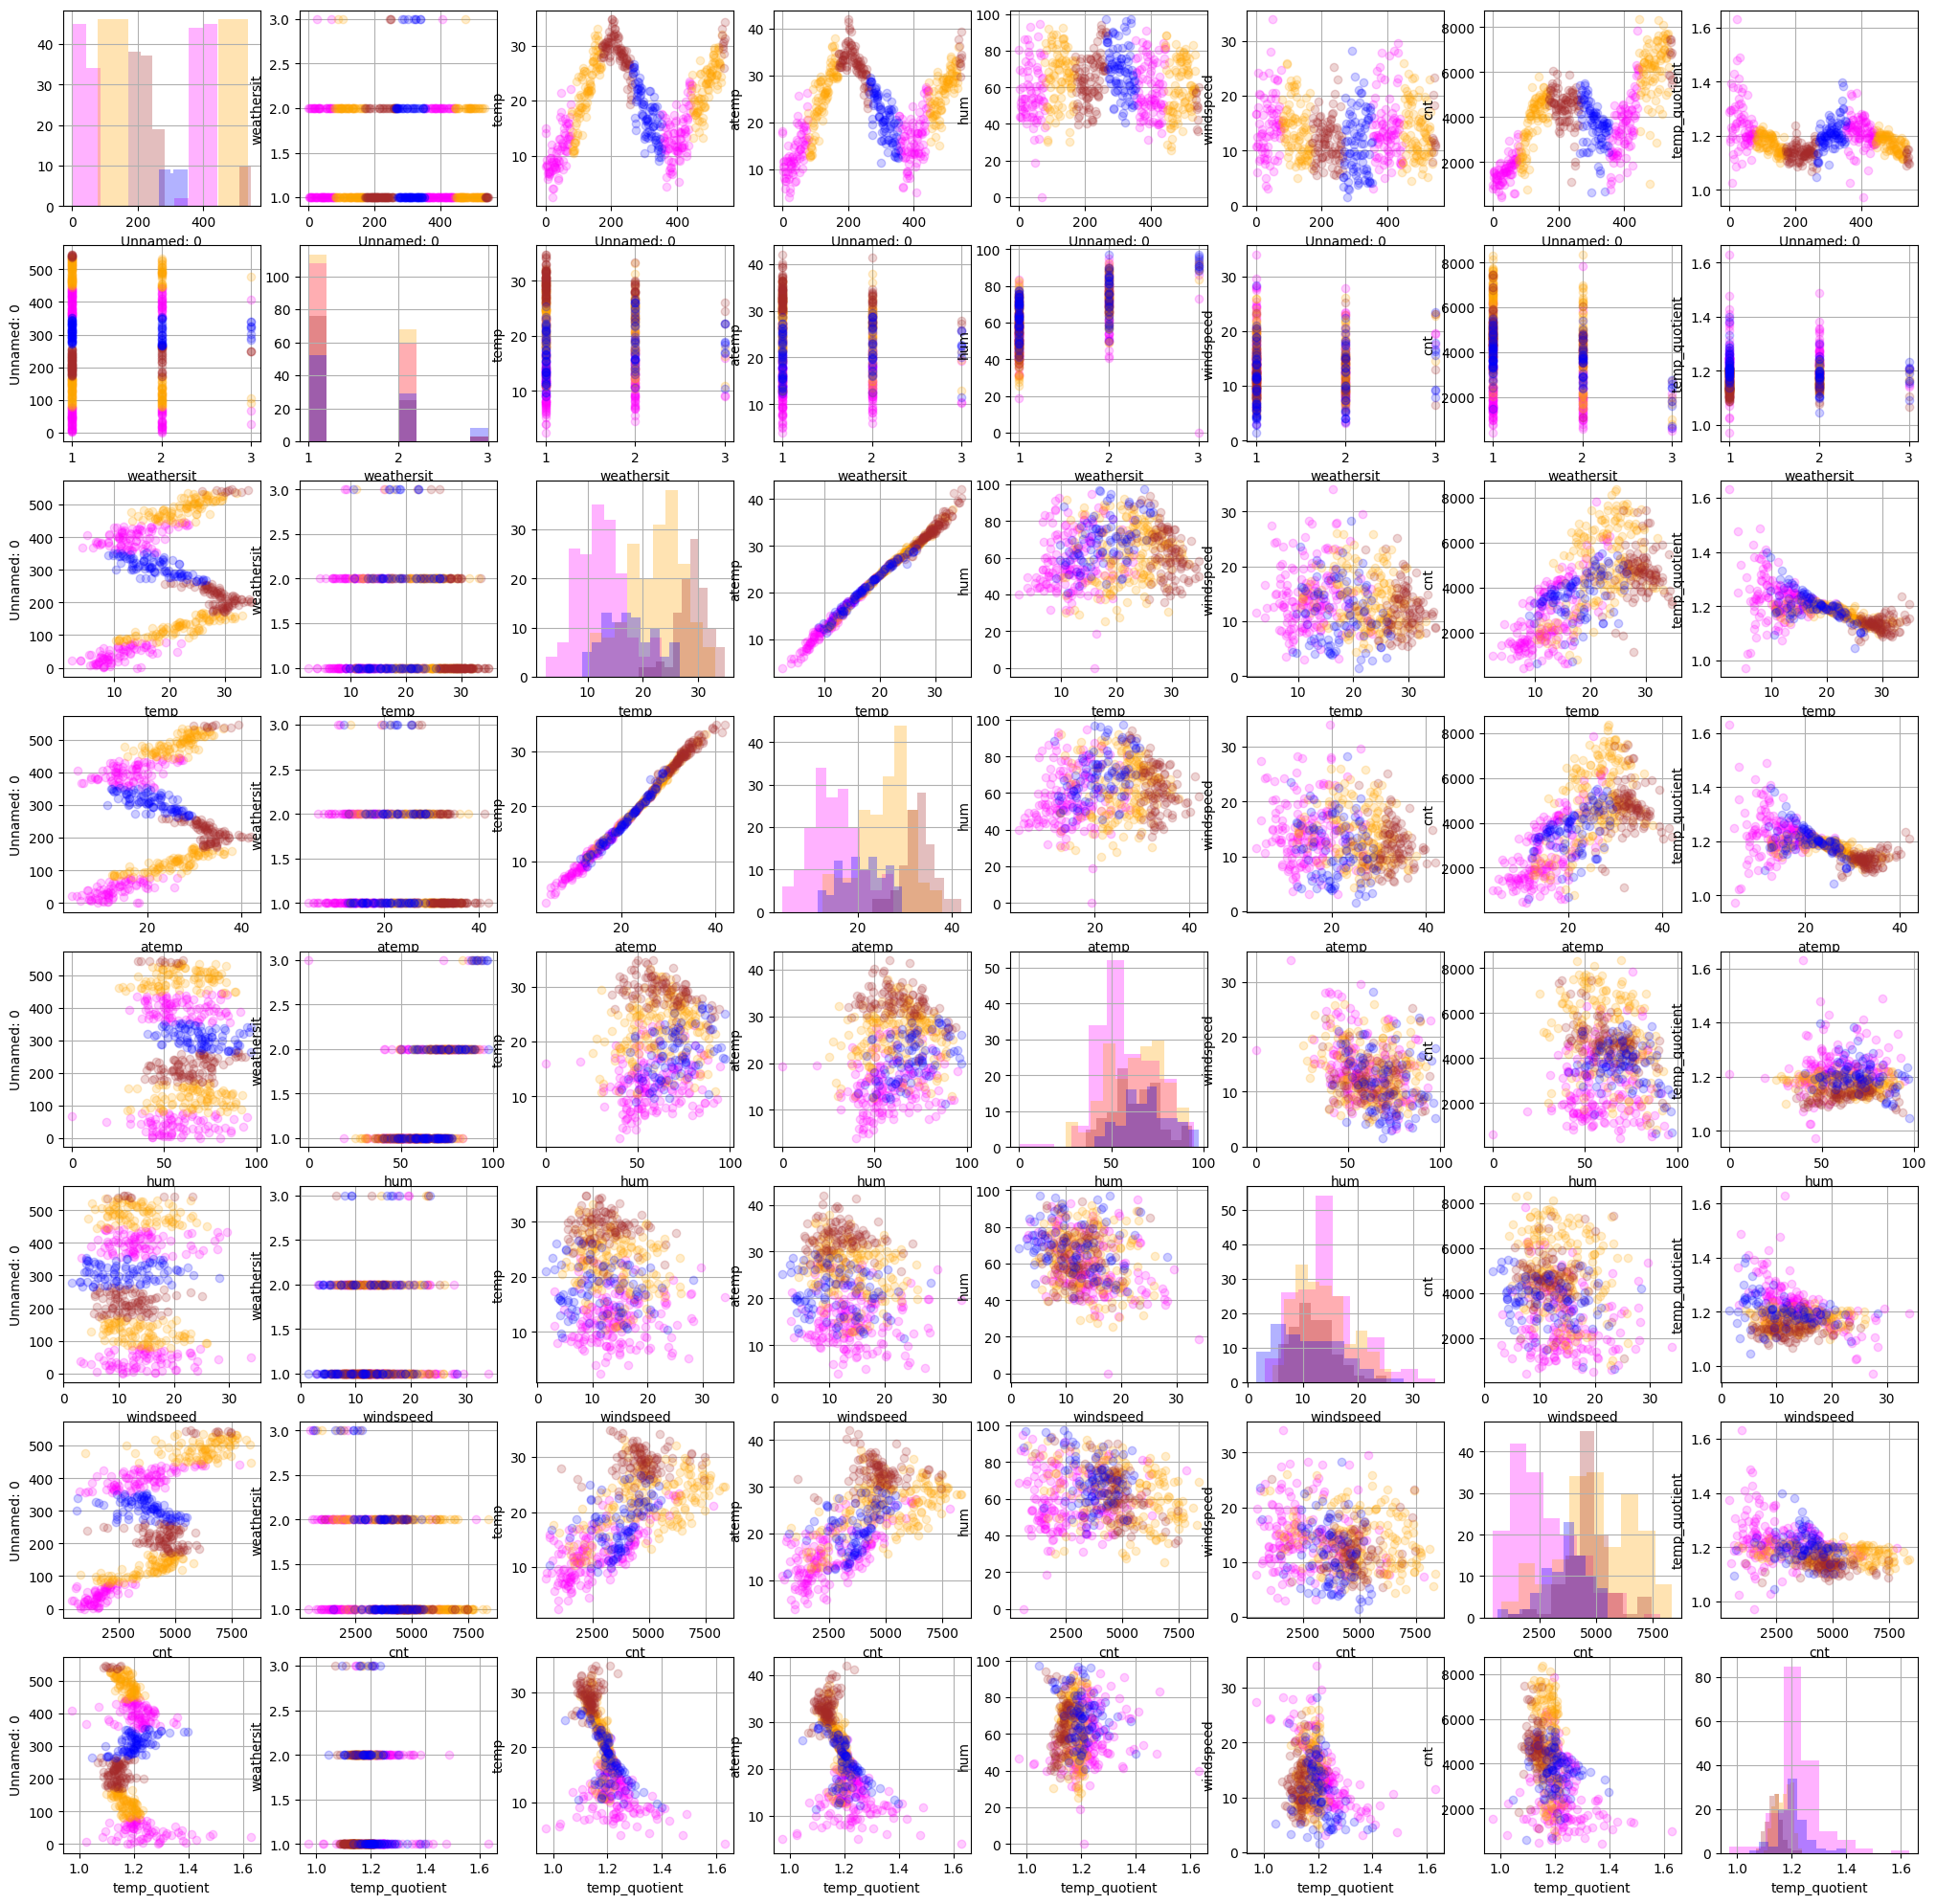

In [23]:
# Wie vorher nur mit neuem Feature temp_quotient
no_show_columns=  ['instant','dteday','intday','casual','registered','season','yr','mnth','holiday','weekday','workingday']
n=len(bike_rental.columns)-len(no_show_columns)
show_columns=list(bike_rental.columns)
for column in no_show_columns:
    show_columns.remove(column)
    
spec_feat='season'
specials=[1,2,3,4]
fig,ax=plt.subplots(n,n,figsize=(25,25))
for i,key in  enumerate(show_columns):
    for j,key2 in enumerate(show_columns):
        if key==key2:
            for spec in specials:
                cond=bike_rental[spec_feat]==spec
                ax[i][i].hist(bike_rental[key].loc[cond],label=key,color=color_dict[spec],alpha=0.3)
            ax[i][i].set_xlabel(key)
        else:
            for spec in specials:
                cond=bike_rental[spec_feat]==spec
                ax[i][j].plot(bike_rental[key].loc[cond],bike_rental[key2].loc[cond],ls='',marker='o',alpha=0.2,color=color_dict[spec])
            ax[i][j].set_xlabel(key)
            ax[i][j].set_ylabel(key2)

        ax[i][j].grid(True)